In [10]:

import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Read the TSV file
file_path = 'q4.data'
data = pd.read_csv(file_path, sep='\t')

# Select columns starting with 'rs'
snps = data.filter(regex='^rs')



In [11]:
print(data)

     individual population  rs189703925_T  rs11240779_A  rs186725148_G  \
0       HG00096        EUR              0             1              0   
1       HG00097        EUR              0             1              0   
2       HG00099        EUR              0             1              0   
3       HG00100        EUR              1             2              0   
4       HG00101        EUR              0             2              0   
...         ...        ...            ...           ...            ...   
1087    NA20816        EUR              0             2              0   
1088    NA20818        EUR              0             2              0   
1089    NA20819        EUR              0             2              0   
1090    NA20826        EUR              0             2              0   
1091    NA20828        EUR              0             1              0   

      rs113978591_G  rs1891908_T  rs61766322_G  rs77315208_C  rs187435200_A  \
0                 0            0

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(snps)

explained_variance = pca.explained_variance_
print(explained_variance)

[220.44349798 184.4141364 ]


In [4]:
groups = data['population']  # Replace 'groups' with the actual column name


[0.04789423 0.04006638]


[220.44349798 184.4141364 ]


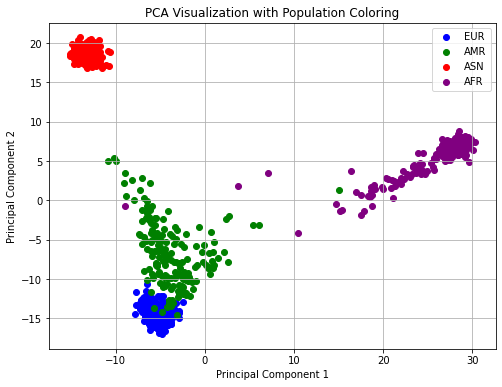

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(0)
# Extract the population labels from the original dataset
population_labels = data['population']  # Replace 'population' with the actual column name

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
transformed_data = pca.fit_transform(snps)

explained_variance = pca.explained_variance_

print(explained_variance)


#somehow asign colors. 
plt.figure(figsize=(8, 6))
unique_populations = set(population_labels)
colors = ['blue', 'green', 'red', "purple"]  # Define colors for different populations

for i, pop_label in enumerate(unique_populations):
    mask = (population_labels == pop_label)
    plt.scatter(transformed_data[mask, 0], transformed_data[mask, 1], label=pop_label, color=colors[i])

plt.title('PCA Visualization with Population Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.savefig('pca_plot_high_res.png', dpi=300)  # Change file format if needed (e.g., '.pdf', '.svg')

plt.show()

In [14]:
#part c: kmeans clustering 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init = 5)
kmeans.fit(snps)
y_kmeans = kmeans.predict(snps)



[2, 1, 3, 0]


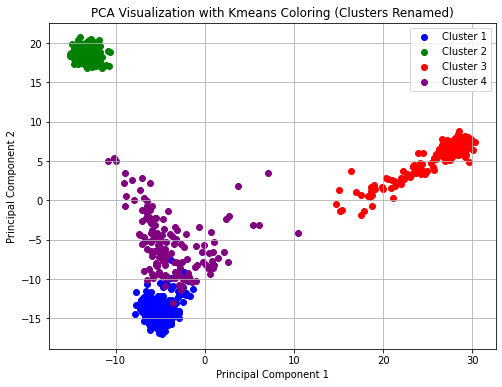

In [15]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


# Get the counts of points in each cluster
cluster_counts = Counter(y_kmeans)

# Sort the clusters based on their counts
sorted_clusters = sorted(cluster_counts, key=cluster_counts.get, reverse = True)

print(sorted_clusters)
# Create a mapping to rearrange the cluster labels
new_labels = np.zeros_like(y_kmeans)
for i, cluster_label in enumerate(sorted_clusters):
    new_labels[y_kmeans == cluster_label] = i + 1  # Renaming clusters starting from 1

# Use the new cluster labels
y_kmeans_renamed = new_labels

plt.figure(figsize=(8, 6))

unique_clusters = set(y_kmeans_renamed)
colors = ['blue', 'green', 'red', "purple"]  # Define colors for different populations

for i, pop_label in enumerate(unique_clusters):
    mask = (y_kmeans_renamed == pop_label)
    plt.scatter(transformed_data[mask, 0], transformed_data[mask, 1], label=f'Cluster {pop_label}', color=colors[i])

plt.title('PCA Visualization with Kmeans Coloring (Clusters Renamed)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

plt.savefig('pca_kmeans_renamed_clusters.png', dpi=300)  # Save the plot
plt.show()



In [16]:
from collections import Counter

cluster_counts = Counter(y_kmeans)

print("Cluster Counts:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} points")


Cluster Counts:
Cluster 2: 413 points
Cluster 1: 286 points
Cluster 0: 150 points
Cluster 3: 243 points


In [17]:
For the fractional counts, need to count the number of points that are correctly assigned to each cluster 

SyntaxError: invalid syntax (2066662116.py, line 1)

In [18]:
#need to calculate the fraction of cluster assignments that agree with true population labels 

from sklearn.metrics import adjusted_rand_score

true_labels = {
    'AMR' : 0,
    'ASN' : 1,
    'AFR' : 3,
    'EUR' : 2
}
mapped_labels = []

for label in population_labels:
    if label in true_labels:#
        mapped_labels.append(true_labels[label])
    else:
        mapped_labels.append(-1)  # Or any placeholder for labels not found in true_labels#

#ari_score = adjusted_rand_score(mapped_labels, y_kmeans)


#def proportion_matching(arr1, arr2):
#    if len(arr1) != len(arr2):
#        return None  # Return None if arrays are of different lengths

#    num_matches = sum(1 for a, b in zip(arr1, arr2) if a == b)
#    total_elements = len(arr1)

#    return num_matches / total_elements if total_elements != 0 else 0  # Calculate proportion

#matching_proportion = proportion_matching(mapped_labels, y_kmeans)
mapped_labels = np.array(mapped_labels)
#mapped labels ae the true labels, y_kmeans ae the predictions. 

In [59]:
cluster_0 = mapped_labels == 0
cluster_0_kmeans = y_kmeans == 0
same_indices_count = np.count_nonzero(cluster_0 & cluster_0_kmeans)
print(same_indices_count/sum(cluster_0)) 

#correct = total correctly assigned to cluster 1/total belonging to cluster 1. 

0.8066298342541437


In [60]:
cluster_1 = mapped_labels == 1
cluster_2_kmeans = y_kmeans == 1
same_indices_count_1 = np.count_nonzero(cluster_1 & cluster_1_kmeans)
print(same_indices_count_1/sum(cluster_1)) 

1.0


In [61]:
cluster_2 = mapped_labels == 2
cluster_2_kmeans = y_kmeans == 2
same_indices_count_2 = np.count_nonzero(cluster_2 & cluster_2_kmeans)
print(same_indices_count_2/sum(cluster_2)) 


1.0


In [62]:
cluster_3 = mapped_labels == 3
cluster_3_kmeans = y_kmeans == 3
same_indices_count_3 = np.count_nonzero(cluster_3 & cluster_3_kmeans)
print(same_indices_count_3/sum(cluster_3)) 


0.983739837398374


In [24]:
from collections import Counter

# Assuming true_cluster_assignments and mapped_cluster_assignments are lists containing cluster assignments
# Count the number of points in each cluster for true and mapped assignments
true_cluster_assignments = mapped_labels
mapped_cluster_assignments = y_kmeans
true_cluster_counts = Counter(true_cluster_assignments)
mapped_cluster_counts = Counter(mapped_cluster_assignments)

# Initialize a dictionary to store the percentage of correctly mapped points for each cluster
correctly_mapped_percentages = {}

# Iterate through unique clusters in true cluster assignments
for cluster_label in set(true_cluster_assignments):
    # Find the number of points in this cluster for true and mapped assignments
    true_count = true_cluster_counts[cluster_label]
    mapped_count = mapped_cluster_counts[cluster_label]
    
    # Find the intersection (number of correctly mapped points)
    intersection = sum(1 for i in range(len(true_cluster_assignments)) if true_cluster_assignments[i] == cluster_label and mapped_cluster_assignments[i] == cluster_label)
    
    # Calculate percentage of correctly mapped points
    if true_count != 0:
        correctly_mapped_percentage = (intersection / true_count) * 100
        correctly_mapped_percentages[cluster_label] = correctly_mapped_percentage

# Print the percentage of correctly mapped points for each cluster
for cluster_label, percentage in correctly_mapped_percentages.items():
    print(f"Cluster {cluster_label}: {percentage:.2f}% correctly mapped")

Cluster 0: 80.66% correctly mapped
Cluster 1: 100.00% correctly mapped
Cluster 2: 100.00% correctly mapped
Cluster 3: 98.37% correctly mapped


In [58]:
print(ari_score)
print(matching_proportion)

#ari score is lower than matching proportion. 

0.8887367522429042
0.9514652014652014


In [32]:
same_indices_count_total = np.count_nonzero(y_kmeans == mapped_labels)
print(same_indices_count_total)
print(len(y_kmeans))
#(same_indices_count_total/len(y_kmeans))

1053
1092
